# 课堂2 Search Based Problem Solving
我们根据中国的城市，做一个简易版的导航地图

### 问题描述

我们在用 networkx 显示中文的时候，会发现不能显示中文。

### 解决办法

1，下载附件中的字体；

2，在 jupyter notebook 中执行

import matplotlib

print(matplotlib.__path__)

找到 matplotlib 的路径，然后 cd 到这个路径。 cd 到这个路径之后，继续 cd，cd 到 mpl-data/fonts/ttf 这个路径。 然后把 DejaVuSans.ttf 这个文件换成我们刚刚下在的文件。

$ mv SimHei.ttf DejaVuSans.ttf

In [1]:
import matplotlib
print(matplotlib.__path__)

['D:\\program64\\Anaconda\\lib\\site-packages\\matplotlib']


### Search Policy

In [3]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [4]:
import networkx as nx

In [5]:
import re

In [6]:
city_location = {}

In [9]:
for line in coordination_source.split('\n'):
    if line.startswith('//'):
        continue
    if line.strip() == '':
        continue
    
    city = re.findall("name:'(\w+)'", line)[0]
    x_y = re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)\]",line)[0]
    x_y = tuple(map(float, x_y))
    city_location[city] = x_y
    print(city,x_y)

兰州 (103.73, 36.03)
嘉峪关 (98.17, 39.47)
西宁 (101.74, 36.56)
成都 (104.06, 30.67)
石家庄 (114.48, 38.03)
拉萨 (102.73, 25.04)
贵阳 (106.71, 26.57)
武汉 (114.31, 30.52)
郑州 (113.65, 34.76)
济南 (117.0, 36.65)
南京 (118.78, 32.04)
合肥 (117.27, 31.86)
杭州 (120.19, 30.26)
南昌 (115.89, 28.68)
福州 (119.3, 26.08)
广州 (113.23, 23.16)
长沙 (113.0, 28.21)
沈阳 (123.38, 41.8)
长春 (125.35, 43.88)
哈尔滨 (126.63, 45.75)
太原 (112.53, 37.87)
西安 (108.95, 34.27)
北京 (116.46, 39.92)
上海 (121.48, 31.22)
重庆 (106.54, 29.59)
天津 (117.2, 39.13)
呼和浩特 (111.65, 40.82)
南宁 (108.33, 22.84)
银川 (106.27, 38.47)
乌鲁木齐 (87.68, 43.77)
香港 (114.17, 22.28)
澳门 (113.54, 22.19)


strip() 方法用于移除字符串头尾指定的字符（默认为空格或换行符）或字符序列。

注意：该方法只能删除开头或是结尾的字符，不能删除中间部分的字符。

In [113]:
import math
#由经纬度计算两地距离的函数
def geo_distance(origin, destination):
    
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [114]:
def get_city_distance(city1, city2):
    return geo_distance(city_location[city1], city_location[city2])

In [13]:
get_city_distance('香港','上海')

933.9310389667804

In [26]:
import networkx as nx

In [62]:
cities = list(city_location.keys())

In [63]:
city_graph = nx.Graph()
city_graph.add_nodes_from(cities)
%matplotlib inline
import matplotlib.pyplot as plt

In [64]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

D:\program64\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
D:\program64\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
D:\program64\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
D:\program64\Anaconda\lib\site-packages\matplotlib\__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
D:\progr

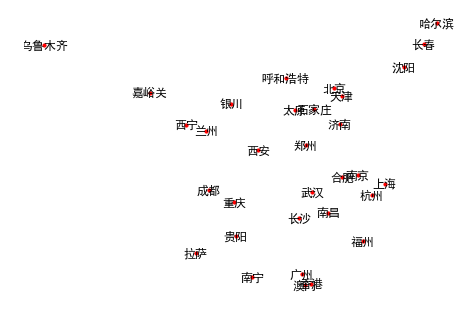

In [65]:
nx.draw(city_graph,city_location,with_labels=True, node_size=10)

In [66]:
threshold = 300
from collections import defaultdict
cities_connection = defaultdict(list)
for c1 in cities:
    for c2 in cities:
        if c1 == c2:
            continue
        if get_city_distance(c1, c2) < threshold:
            cities_connection[c1].append(c2)


In [68]:
cities_connection

defaultdict(list,
            {'上海': ['杭州'],
             '兰州': ['银川', '成都', '西宁'],
             '北京': ['石家庄', '天津', '济南'],
             '南京': ['杭州', '合肥'],
             '南宁': ['贵阳'],
             '南昌': ['合肥', '武汉'],
             '合肥': ['南昌', '济南', '南京'],
             '呼和浩特': ['太原'],
             '哈尔滨': ['长春'],
             '天津': ['北京', '济南'],
             '太原': ['石家庄', '呼和浩特', '郑州'],
             '广州': ['香港', '长沙', '澳门'],
             '成都': ['拉萨', '西宁', '重庆', '兰州'],
             '拉萨': ['成都', '西宁'],
             '杭州': ['福州', '上海', '南京'],
             '武汉': ['南昌', '长沙', '郑州'],
             '沈阳': ['长春'],
             '济南': ['北京', '石家庄', '天津', '合肥'],
             '澳门': ['广州', '香港', '长沙'],
             '石家庄': ['太原', '北京', '郑州', '济南'],
             '福州': ['杭州'],
             '西宁': ['拉萨', '成都', '兰州'],
             '贵阳': ['南宁', '重庆'],
             '郑州': ['太原', '石家庄', '长沙', '武汉'],
             '重庆': ['银川', '成都', '贵阳'],
             '银川': ['重庆', '兰州'],
             '长春': ['沈阳', '哈尔滨'],
        

将字典传递给nx.Graph()，可得无向图，如下

D:\program64\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
D:\program64\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
D:\program64\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
D:\program64\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
D:\program64\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:138: Ma

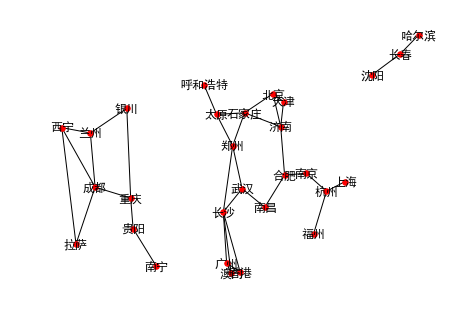

In [69]:
cities_connection_graph = nx.Graph(cities_connection)
nx.draw(cities_connection_graph, city_location, with_labels=True, node_size=30)

In [70]:
simple_connection_info_src = {
    '北京': ['太原', '沈阳'],
    '太原': ['北京', '西安', '郑州'],
    '兰州': ['西安'],
    '郑州': ['太原'],
    '西安': ['兰州', '长沙'],
    '长沙': ['福州', '南宁'],
    '沈阳': ['北京']
}


In [71]:
from collections import defaultdict
simple_connection_info = defaultdict(list)
simple_connection_info.update(simple_connection_info_src)

In [90]:
#breadth first search
def bfs(graph, start):
    visited = [start]
    seen = set()
    while visited:
        fronter = visited.pop()
        if fronter in seen:
            continue
        for next in graph[fronter]:
            if next in seen:
                continue
            print(next)
            visited = [next] + visited   # 我们每次扩展都先考虑已经发现的 老的点 -> breath first
            #visited = visited + [next] # 我们每次扩展都扩展最新发现的点 -> depth first
        seen.add(fronter)
    return seen
    

In [85]:
bfs(simple_connection_info,'北京')

太原
沈阳
西安
郑州
兰州
长沙
福州
南宁


{'兰州', '北京', '南宁', '太原', '沈阳', '福州', '西安', '郑州', '长沙'}

In [86]:
number_grpah = defaultdict(list)

number_grpah.update({
    1: [2, 3],
    2: [1, 4], 
    3: [1, 5],
    4: [2, 6], 
    5: [3, 7],
    7: [5, 8]
})

In [91]:
bfs(number_grpah, 1)

2
3
4
5
6
7
8


{1, 2, 3, 4, 5, 6, 7, 8}

D:\program64\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
D:\program64\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
D:\program64\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
D:\program64\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
D:\program64\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:138: Ma

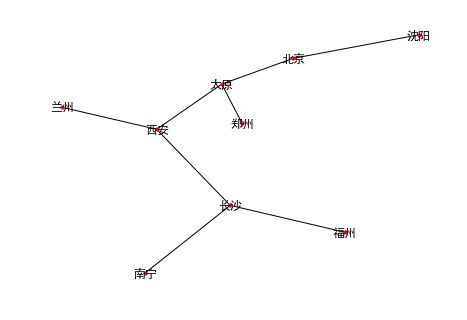

In [93]:
simple_connection_info_graph = nx.Graph(simple_connection_info)
nx.draw(simple_connection_info_graph,city_location, with_labels=True, node_size=10)

In [136]:
def search(start, destination, connection_graph, sort_candidate=shortest_path_first):
    pathes = [[start]]
    visited = set()
    while pathes: # if we find existing pathes
        path = pathes.pop(0)
        fronter = path[-1]
        if fronter in visited: continue
        nextcities = connection_graph[fronter]
        for city in nextcities:
            if city in path: continue  # eliminate loop
            new_path = path + [city]
            pathes.append(new_path)
            if city == destination:
                return new_path
        visited.add(fronter)
        
        pathes = sort_candidate(pathes)  # 我们可以加一个排序函数 对我们的搜索策略进行控制

In [128]:
def transfer_stations_first(pathes):
    return sorted(pathes, key=len)

In [129]:
def transfer_as_much_possible(pathes):
    return sorted(pathes, key=len, reverse=True)

In [135]:
def shortest_path_first(pathes):
    if len(pathes) <= 1 : return pathes
    def get_path_distance(path):
        distance = 0
        for i,station in enumerate(path[:-1]):
            distance += get_city_distance(station,path[i+1])
        return distance
    return sorted(pathes, key = get_path_distance)

In [137]:
search('兰州','福州',simple_connection_info, sort_candidate=shortest_path_first)

['兰州', '西安', '长沙', '福州']

In [132]:
def pretty_print(cities):
    print('🚗->'.join(cities))

In [139]:
pretty_print(search('北京','福州',simple_connection_info,sort_candidate=shortest_path_first))

北京🚗->太原🚗->西安🚗->长沙🚗->福州


Assignment

1.网络爬虫 + 正则

2.数据处理

3.算法的应用能力

In [144]:
import requests
url = 'https://movie.douban.com/subject/26931786/?from=showing'
response = requests.get(url)

In [161]:
what_we_want = r'alt="(\w+)"\s+class=""'

In [162]:
pattern = re.compile(what_we_want)
likes = pattern.findall(response.text)
for like in likes:
    print(like)

美国队长3
钢铁侠
银河护卫队2
蚁人
惊奇队长
黑寡妇
头号玩家


# Machine learning

In [1]:
from sklearn.datasets import load_boston
dataset = load_boston()
x, y = dataset['data'], dataset['target']


In [2]:
x.shape

(506, 13)

In [3]:
y.shape

(506,)

In [4]:
x[0]

array([  6.32000000e-03,   1.80000000e+01,   2.31000000e+00,
         0.00000000e+00,   5.38000000e-01,   6.57500000e+00,
         6.52000000e+01,   4.09000000e+00,   1.00000000e+00,
         2.96000000e+02,   1.53000000e+01,   3.96900000e+02,
         4.98000000e+00])

In [5]:
help(load_boston)

Help on function load_boston in module sklearn.datasets.base:

load_boston(return_X_y=False)
    Load and return the boston house-prices dataset (regression).
    
    ==============     ==============
    Samples total                 506
    Dimensionality                 13
    Features           real, positive
    Targets             real 5. - 50.
    ==============     ==============
    
    Read more in the :ref:`User Guide <boston_dataset>`.
    
    Parameters
    ----------
    return_X_y : boolean, default=False.
        If True, returns ``(data, target)`` instead of a Bunch object.
        See below for more information about the `data` and `target` object.
    
        .. versionadded:: 0.18
    
    Returns
    -------
    data : Bunch
        Dictionary-like object, the interesting attributes are:
        'data', the data to learn, 'target', the regression targets,
        'DESCR', the full description of the dataset,
        and 'filename', the physical location of bost

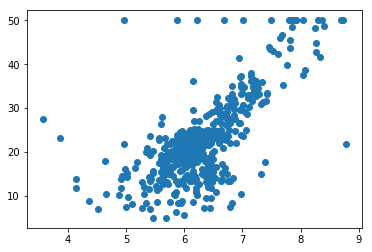

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline
# 由于 %matplotlib inline 的存在，当输入plt.plot(x,y)后，
#不必再输入 plt.show()，图像将自动显示出来
plt.scatter(x[:, 5], y)

### 梯度下降，误差反向传播

loop = 1000
f(number) = 59.0547859003916 * number + -59.698356562936056, with error rate: 85438.32885268601
loop = 1000
f(number) = 58.870757536097535 * number + -59.72724722046808, with error rate: 84740.01737319802
loop = 1000
f(number) = 58.687483245524966 * number + -59.7560193338357, with error rate: 84047.41715177416
loop = 1000
f(number) = 58.504959938683335 * number + -59.7846733888011, with error rate: 83360.48147792631
loop = 1000
f(number) = 58.323184538244035 * number + -59.81320986913594, with error rate: 82679.16402319592
loop = 1000
f(number) = 58.14215397948852 * number + -59.8416292566295, with error rate: 82003.4188380295
loop = 1000
f(number) = 57.96186521025663 * number + -59.86993203109685, with error rate: 81333.20034867983
loop = 1000
f(number) = 57.78231519089515 * number + -59.89811867038687, with error rate: 80668.46335413224
loop = 1000
f(number) = 57.60350089420651 * number + -59.92618965039037, with error rate: 80009.16302305619
loop = 1000
f(number) = 57.4

loop = 1000
f(number) = 43.32564077600466 * number + -62.16690707623254, with error rate: 36104.03689894397
loop = 1000
f(number) = 43.20606359445897 * number + -62.18566568608, with error rate: 35809.214227897195
loop = 1000
f(number) = 43.08697638308647 * number + -62.20434727017977, with error rate: 35516.80281358379
loop = 1000
f(number) = 42.968377134121674 * number + -62.222952144162754, with error rate: 35226.78293513356
loop = 1000
f(number) = 42.85026384802636 * number + -62.24148062236651, with error rate: 34939.13503296673
loop = 1000
f(number) = 42.73263453345588 * number + -62.2599330178405, with error rate: 34653.839707474865
loop = 1000
f(number) = 42.615487207225584 * number + -62.27830964235142, with error rate: 34370.8777177125
loop = 1000
f(number) = 42.49881989427737 * number + -62.2966108063884, with error rate: 34090.22998009951
loop = 1000
f(number) = 42.38263062764639 * number + -62.31483681916829, with error rate: 33811.87756713402
loop = 1000
f(number) = 42.26

loop = 1000
f(number) = 17.73698160792717 * number + -66.16942024334139, with error rate: 603.2013840860403
loop = 1000
f(number) = 17.72224717932213 * number + -66.17169706513874, with error rate: 598.7281619276511
loop = 1000
f(number) = 17.707573103601174 * number + -66.17396439920425, with error rate: 594.291524522736
loop = 1000
f(number) = 17.6929591334545 * number + -66.17622228441627, with error rate: 589.8911726567128
loop = 1000
f(number) = 17.678405022585718 * number + -66.17847075949383, with error rate: 585.5268095621781
loop = 1000
f(number) = 17.663910525707692 * number + -66.18070986299732, with error rate: 581.1981408988887
loop = 1000
f(number) = 17.64947539853841 * number + -66.1829396333291, with error rate: 576.9048747339151
loop = 1000
f(number) = 17.635099397796857 * number + -66.1851601087342, with error rate: 572.6467215219492
loop = 1000
f(number) = 17.62078228119892 * number + -66.18737132730088, with error rate: 568.4233940857771
loop = 1000
f(number) = 17.6

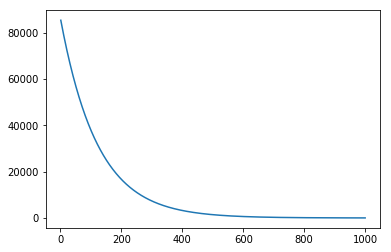

In [25]:
room_num = x[:,5]
price = y
import random
import numpy as np

def func(number, k, b):
    return k*number +b

def loss(y, yhat):
    """
    :parameter y: the real fares
    :parameter yhat: the estimated fares
    :return: how good is the estimated fares
    """
    return np.mean(np.square(y - yhat))

min_error_rate = float('inf')
loop_times = 1000
losses = []
change_directions = [
    #(k,b)
    (-1, -1), # k decrease, b decrease
    (-1, +1),
    (+1, -1), # k increase, b decrease
    (+1, +1)
]

k_hat = random.random() * 200 - 100
b_hat = random.random() * 200 - 100

best_k, best_b = k_hat, b_hat
best_direction = None

def step():
    return random.random() * 1

direction = random.choice(change_directions)

def derivate_k(y, yhat, x):
    #abs_values = [1 if(y_i - yhat_i)> 0 else -1 for y_i, yhat_i in zip(y, yhat)]
    abs_values =[y_i - yhat_i for y_i, yhat_i in zip(y, yhat)]
    return np.mean([a * (-x_i) for a, x_i in zip(abs_values, x)])  

def derivate_b(y, yhat):
    #abs_values = [1 if(y_i - yhat_i)>0 else -1 for y_i, yhat_i in zip(y, yhat)]
    abs_values = [y_i - yhat_i for y_i, yhat_i in zip(y, yhat)]
    return np.mean([a*-1 for a in abs_values])

learning_rate = 1e-4

loop_time = 1000

while loop_time>0:
    
    estimated_price = func(room_num, k_hat, b_hat)
    error_rate = loss(y = price, yhat = estimated_price)
    
    #变化量△k,△b均为梯度的反方向
    k_delta = -1 * learning_rate * derivate_k(price, estimated_price, room_num)
    b_delta = -1 * learning_rate * derivate_b(price, estimated_price)
    
    k_hat += k_delta
    b_hat += b_delta
    
    print('loop = {}'.format(loop_times))
    print('f(number) = {} * number + {}, with error rate: {}'.format(k_hat, b_hat, error_rate))
    
    losses.append(error_rate)
    
    loop_time -= 1
    
losses_x = map(lambda x:x+1, range(len(losses)))
losses_x = list(losses_x)
plt.plot(losses_x, losses)
plt.show()

In [8]:
range(10)

range(0, 10)

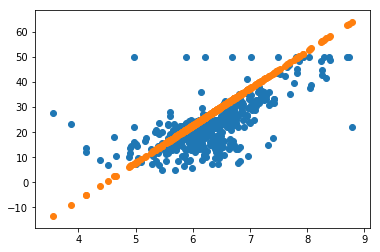

In [26]:
k = 14.883112895835302
b =  -66.60289641541591
price_by_k_and_b = [func(r,k,b) for r in room_num ]
plt.scatter(room_num,price)
plt.scatter(room_num, price_by_k_and_b)

# 新的练习

$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}^2$$
$$ loss = \frac{1}{n} \sum{(y_i - (kx_i + b_i))}^2 $$
$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - (kx_i + b_i))x_i$$
$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - \hat{y_i})x_i$$
$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum(y_i - \hat{y_i})$$

In [29]:
def loss(y, y_hat):#to evaluate the performance
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat)))/ len(list(y))

def price(r, k, b):
    return k * r + b

#导入数据
from sklearn.datasets import load_boston
dataset = load_boston()
x, y = dataset['data'], dataset['target']
x_rm = x[:,5]


## first_method: random generation: get best k and best b

In [33]:
trying_times = 2000

min_loss = float('inf')
best_k, best_b = None, None

for i in range(trying_times):
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    price_by_random_k_and_b = [price(r, k, b) for r in x_rm]
    current_loss = loss(y, price_by_random_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('When time is : {}, get best_k:{}, best_b:{}, and the loss is :{}'.format(i, best_k, best_b, min_loss))

When time is : 0, get best_k:82.86531852141508, best_b:-21.99989058396281, and the loss is :229534.16875699544
When time is : 1, get best_k:-48.335134317918005, best_b:-7.693338329932757, and the loss is :113221.54127913712
When time is : 2, get best_k:17.879824777067753, best_b:77.62619549697195, and the loss is :28124.93287649504
When time is : 9, get best_k:0.9719907059894979, best_b:43.215934869854124, and the loss is :793.9641772307392
When time is : 37, get best_k:14.277289568117894, best_b:-59.236954350461836, and the loss is :120.12248951335665
When time is : 485, get best_k:9.818163632329075, best_b:-34.9393511957724, and the loss is :61.75801477923614
When time is : 532, get best_k:4.60207362867024, best_b:-8.989743271354072, and the loss is :60.33882366140756
When time is : 589, get best_k:13.265450833578484, best_b:-60.23929660367138, and the loss is :52.49634218174002
When time is : 806, get best_k:8.228395759779005, best_b:-28.788949147340787, and the loss is :44.12931208

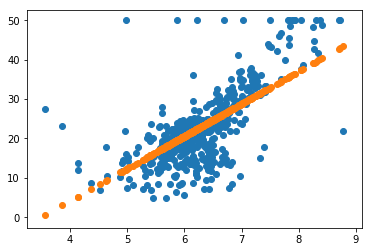

In [34]:
k = best_k
b = best_b
price_by_random_k_and_b = [price(r, k, b) for r in x_rm]

from matplotlib import pyplot as plt
plt.scatter(x_rm, y)
plt.scatter(x_rm, price_by_random_k_and_b)

##  second_method: direction adjusting

In [44]:
trying_times = 2000
min_loss = float('inf')
best_k = random.random() * 200 - 100
best_b = random.random() * 200 -100

direction = [
    (+1,+1), (+1,-1), (-1,+1), (-1,-1)
#first element: change direction of k, second element:change direction of b
]

next_direction = random.choice(direction)
learn_rate = 1e-1
update_times = 0

for i in range(trying_times):
    k_direction, b_direction = next_direction
    current_k, current_b = best_k + learn_rate* k_direction, best_b + learn_rate* b_direction
    price_by_k_and_b = [price(r, current_k, current_b) for r in x_rm]
    current_loss = loss(y, price_by_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k = current_k
        best_b = current_b
        next_direction = next_direction #如果这个方向使损失函数降低，将继续保持该调节方向
    else:
        next_direction = random.choice(direction)#如果这个方向不能使损失函数降低，换一个新的方向
        
        
    update_times += 1
    if update_times % 100 == 0:
        print('When times is:{}, get best_k:{}, best_b:{}, and the loss is:{}'.format(i,best_k,best_b,min_loss))

When times is:99, get best_k:-44.31721230386985, best_b:15.00022661173637, and the loss is:83274.20198918357
When times is:199, get best_k:-34.31721230386971, best_b:5.000226611736405, and the loss is:55356.41943033916
When times is:299, get best_k:-24.317212303869567, best_b:-4.999773388263593, and the loss is:33122.64803631726
When times is:399, get best_k:-14.317212303869455, best_b:-14.999773388263558, and the loss is:16572.887807117684
When times is:499, get best_k:-4.317212303869491, best_b:-24.99977338826368, and the loss is:5707.138742740537
When times is:599, get best_k:5.682787696130507, best_b:-34.99977338826382, and the loss is:525.400843185461
When times is:699, get best_k:9.782787696130493, best_b:-39.09977338826388, and the loss is:43.851731559708035
When times is:799, get best_k:9.782787696130493, best_b:-39.09977338826388, and the loss is:43.851731559708035
When times is:899, get best_k:9.782787696130493, best_b:-39.09977338826388, and the loss is:43.851731559708035
Wh

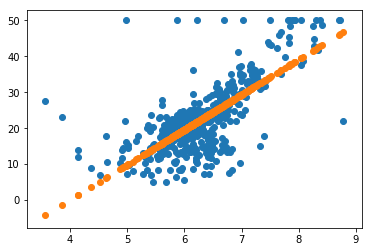

In [45]:
k = best_k
b = best_b
price_by_k_and_b = [price(r, k, b) for r in x_rm]

from matplotlib import pyplot as plt
plt.scatter(x_rm, y)
plt.scatter(x_rm, price_by_k_and_b)

## third method:derivate

### 如果我们想得到更快的更新，在更短的时间内获得更好的结果，我们需要一件事情：

找对改变的方向

如何找对改变的方向呢？

## 导数

In [54]:
def partial_k(x, y, y_hat):
    n = len(y)
    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
    
    return -2/ n * gradient

def partial_b(y, y_hat):
    n = len(y)
    gradient = 0
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i - y_hat_i)
    
    return -2/ n * gradient

In [75]:
trying_times = 2000
min_loss = float('inf')
current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100
learning_rate = 1e-2
update_times = 0
best_k = None
best_b = None
for i in range(trying_times):
    price_by_k_and_b = [price(r, current_k, current_b) for r in x_rm]
    current_loss = loss(y, price_by_k_and_b)
    
    if current_loss < min_loss:
        min_loss= current_loss
        best_k = current_k
        best_b = current_b
        if i % 50 == 0:
            print(
            'When times is:{}, get best_k:{}, best_b:{}, and the loss is:{}'.format(i,best_k,best_b,min_loss)
            )

    k_gradient = partial_k(x_rm, y, price_by_k_and_b)
    b_gradient = partial_b(y, price_by_k_and_b)
    current_k = current_k + k_gradient* learning_rate* (-1) #参数调整方向为导数的反方向
    current_b = current_b + b_gradient* learning_rate*(-1)
    


When times is:0, get best_k:-69.58394179421035, best_b:-46.345178839598674, and the loss is:259320.0255099655
When times is:50, get best_k:8.996717270229526, best_b:-34.00021166583857, and the loss is:43.60608931581511
When times is:100, get best_k:8.997977022303768, best_b:-34.00822509744576, and the loss is:43.60595772593081
When times is:150, get best_k:8.999221716502259, best_b:-34.01614274412833, and the loss is:43.60582926304575
When times is:200, get best_k:9.000451532812496, best_b:-34.023965750807974, and the loss is:43.605703852852294
When times is:250, get best_k:9.00166664907058, best_b:-34.03169524872113, and the loss is:43.6055814228087
When times is:300, get best_k:9.002867240986921, best_b:-34.03933235558244, and the loss is:43.605461902097005
When times is:350, get best_k:9.004053482171662, best_b:-34.046878175746514, and the loss is:43.60534522158212
When times is:400, get best_k:9.005225544159767, best_b:-34.05433380036752, and the loss is:43.60523131377175
When time

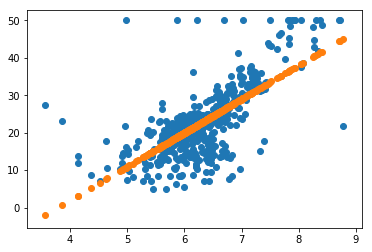

In [76]:
k = best_k
b = best_b
price_by_k_and_b = [price(r, k, b) for r in x_rm]

from matplotlib import pyplot as plt
plt.scatter(x_rm, y)
plt.scatter(x_rm, price_by_k_and_b)